In [109]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([
    [1,2],
    [1,1.5],
    [1.5, 1.8],
    [5, 8],
    [8, 8],
    [1, 0.6],
    [9, 11]
])


class KMeans:
    
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k # колличество кластеров
        self.tol = tol # точность
        self.max_iter=max_iter # максимальное колличество итераций
        
        
    def fit(self, data):
        self.centroids = {} # центроид (центры кластеров)
        
        for i in range(self.k):
            self.centroids[i] = data[i]
            
        print('centroid:', self.centroids)
            
        for i in range(self.max_iter):
            self.classifications = {}
            
            for i in range(self.k):
                self.classifications[i] = []
                
            for featureset in X:
                distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
            
            prev_centroids = dict(self.centroids)
            
            # уточняем центроид
            for classification in self.classifications:
                print('-'*100)
                print(self.classifications[classification])
                print(np.average(self.classifications[classification], axis=0))
                print('-'*100)
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)

            optimized = True

            # когда остановить алгоритм
            for c in self.centroids:
                original_cetroid = prev_centroids[c]
                current_centroid = self.centroids[c]

                if np.sum((current_centroid-original_cetroid) / original_cetroid * 100.0) > self.tol:
                    optimized = False

            if optimized:
                break

    def predict(self, featureset):
        distances = [np.linalg.norm(featureset) - self.centroids[centroid] for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

In [110]:
clf = KMeans()
clf.fit(X)

centroid: {0: array([ 1.,  2.]), 1: array([ 1. ,  1.5])}
----------------------------------------------------------------------------------------------------
[array([ 1.,  2.]), array([ 1.5,  1.8]), array([ 5.,  8.]), array([ 8.,  8.]), array([  9.,  11.])]
[ 4.9   6.16]
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
[array([ 1. ,  1.5]), array([ 1. ,  0.6])]
[ 1.    1.05]
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
[array([ 5.,  8.]), array([ 8.,  8.]), array([  9.,  11.])]
[ 7.33333333  9.        ]
----------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------

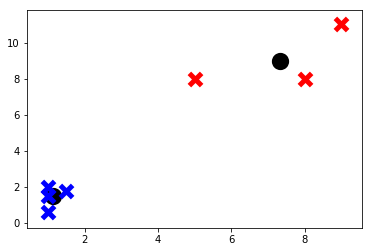

In [111]:
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker='o', color='k', s=150, linewidth=5)

    
colors = ['r', 'b']
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker='x', color=color, s=150, linewidth=5)
plt.show()

In [112]:
a = np.array([[1,1], [5,5]])
print(a)
np.average(a, axis=0)

[[1 1]
 [5 5]]


array([ 3.,  3.])